In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Step 2: Load Dataset (Sleep Health & Lifestyle Dataset from Kaggle mirror on GitHub)
url = "/content/Sleep_health_and_lifestyle_dataset.csv"
data = pd.read_csv(url)

In [5]:
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (374, 13)
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1        

In [9]:
# Step 3: Preprocessing
# Encode categorical features
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Occupation'] = encoder.fit_transform(data['Occupation'])
data['BMI Category'] = encoder.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = encoder.fit_transform(data['Sleep Disorder'])

In [10]:
# Fix Blood Pressure column
bp_split = data['Blood Pressure'].str.split('/', expand=True)
data['Systolic'] = bp_split[0].astype(float)
data['Diastolic'] = bp_split[1].astype(float)
data = data.drop('Blood Pressure', axis=1)


In [11]:
# Features & Target
X = data.drop(["Sleep Disorder"], axis=1)
y = data["Sleep Disorder"]

In [12]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Step 5: Train Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
# Step 6: Evaluate Model
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.87      0.81      0.84        16
           2       0.98      0.98      0.98        44

    accuracy                           0.93        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.93      0.93      0.93        75



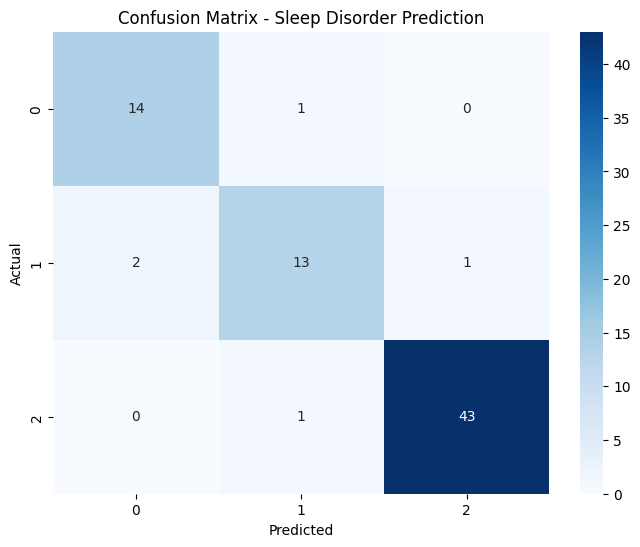

In [16]:
# Step 7: Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.inverse_transform([0,1,2]),
            yticklabels=encoder.inverse_transform([0,1,2]))
plt.title("Confusion Matrix - Sleep Disorder Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Step 8: Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=data.drop("Sleep Disorder", axis=1).columns)
feature_importance = feature_importance.sort_values(ascending=False)

/tmp/ipython-input-250959146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


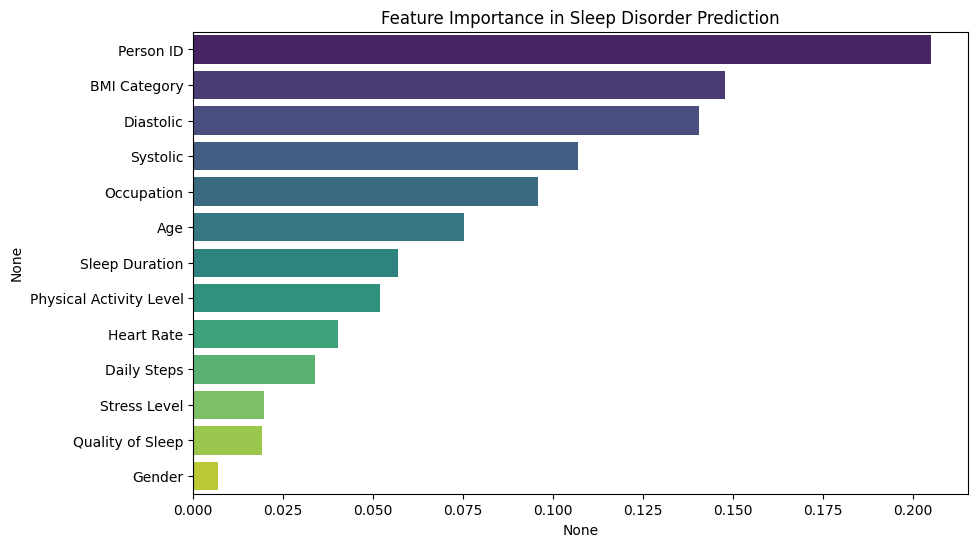

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance in Sleep Disorder Prediction")
plt.show()

In [22]:
X = data.drop("Sleep Disorder", axis=1)
print(X.columns)
print(len(X.columns))


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic'],
      dtype='object')
13


In [24]:
sample = pd.DataFrame(
    [[101, 1, 30, 2, 6, 8, 2200, 8, 60, 72, 5000, 126, 83]],
    columns=X.columns
)

# Convert to NumPy array for prediction
pred = model.predict(sample.values)
print("🛌 Predicted Sleep Disorder:", encoder.inverse_transform(pred)[0])

# 0 = None, 1 = Insomnia, 2 = Sleep Apnea





🛌 Predicted Sleep Disorder: 1
